In [30]:
import numpy as np
import matplotlib.pyplot as plt
import country_codes as codes

# 1 - 2 Get file and convert to numpy array
bef_stat = np.genfromtxt(
    "befkbhalderstatkode.csv", delimiter=",", dtype=np.uint, skip_header=1
)

In [31]:
# 3 Find out how many people lived in each area in 2015
neighb = {
    1: "Indre By",
    2: "Østerbro",
    3: "Nørrebro",
    4: "Vesterbro/Kgs. Enghave",
    5: "Valby",
    6: "Vanløse",
    7: "Brønshøj-Husum",
    8: "Bispebjerg",
    9: "Amager Øst",
    10: "Amager Vest",
    99: "Udenfor",
}

no_of_people = {}
mask_year = bef_stat[:, 0] == 2015

# Checking for each neighbourhood
for c_code, name in neighb.items():
    mask = (bef_stat[:, 1] == c_code) & (bef_stat[:, 0] == 2015)
    no_of_people[name] = bef_stat[mask][:, 4].sum()
no_of_people

{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

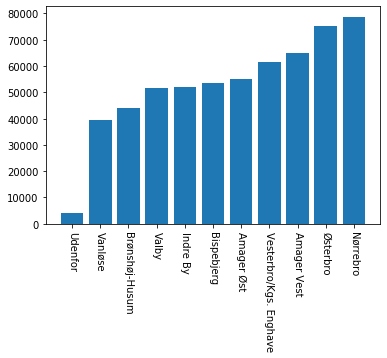

In [32]:
# 4 Make a bar plot showing data from 3 from lowest to highest
# Sorting data
sorted_people = {
    k: v for k, v in sorted(no_of_people.items(), key=lambda item: item[1])
}

plt.figure()
people = list(sorted_people.values())

# Converting neighborhoods to strings so that pyplot will not treat it as ints
# and therefore not rearange the sorted data

neighborhoods = list([str(k) for k in sorted_people.keys()])
plt.bar(neighborhoods, people, align="center")
plt.xticks(rotation=-90)
plt.show()

In [33]:
# 5 Find out how many people above 65 lived in Copenhagen in 2015 (using boolean mask)
mask_above_65 = (bef_stat[:, 2] >= 65) & (mask_year)
above_65 = bef_stat[mask_above_65][:, 4].sum()
print("Above 65: ", above_65)

Above 65:  59859


In [34]:
# 6 How many of those were from the other nordic countries
# Not sure if correct - only returns 614 of 59859
nordic_people = 0
c = codes.country_codes
for key in c:
    if (
        c[key] == "Grønland"
        or c[key] == "Sverige"
        or c[key] == "Norge"
        or c[key] == "Finland"
    ):
        mask_n = (mask_above_65) & (bef_stat[:, 3] == key)
        nordic_people += bef_stat[mask_n][:, 4].sum()
nordic_people

614

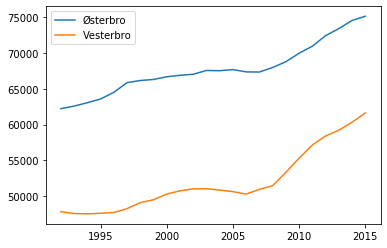

In [35]:
# 7 Line plot of change of people in Vesterbro and Østerbro from 1992 - 2015
years = range(1992, 2016)
oesterbro = {}
vesterbro = {}

areas = [2, 4]
for y in years:
    mask = (bef_stat[:, 1] == 2) & (bef_stat[:, 0] == y)
    oesterbro[y] = bef_stat[mask][:, 4].sum()

    mask = (bef_stat[:, 1] == 4) & (bef_stat[:, 0] == y)
    vesterbro[y] = bef_stat[mask][:, 4].sum()

plt.figure()
p1 = plt.plot(list(oesterbro.keys()), list(oesterbro.values()))
p2 = plt.plot(list(vesterbro.keys()), list(vesterbro.values()))
plt.legend((p1[0], p2[0]), ("Østerbro", "Vesterbro"))
plt.show()